In [22]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [12]:
cwd = os.getcwd()
meta_data = os.path.join(cwd, "..", "data", "raw_data", "metadata.csv")
time_series = os.path.join(cwd, "..", "data", "raw_data", "2min.parquet")

df_energy = pd.read_parquet(time_series)
df_spec = pd.read_csv(meta_data)

df_spec.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


<Axes: >

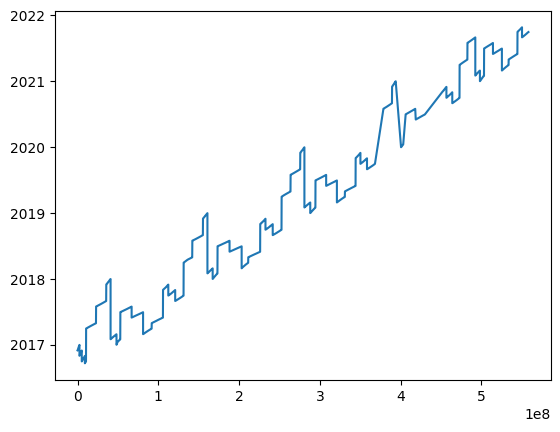

In [11]:
sample = df_energy[df_energy.ss_id == 3952]
sample = sample.drop(columns='ss_id')
sample['timestamp'].plot()

In [5]:
df_spec.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


In [54]:
import plotly.express as px
fig = px.scatter_geo(df_spec,lat=df_spec['latitude_rounded'],lon=df_spec['longitude_rounded'], scope="europe",projection="natural earth") 
fig

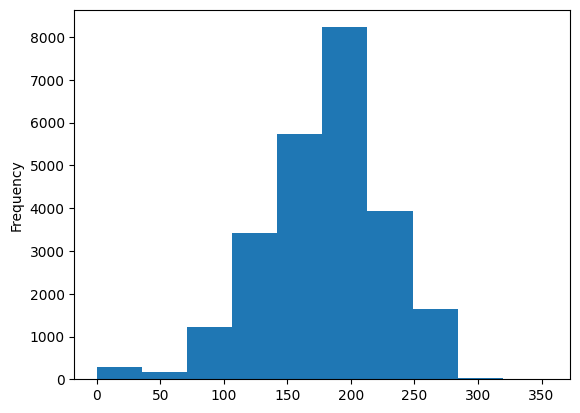

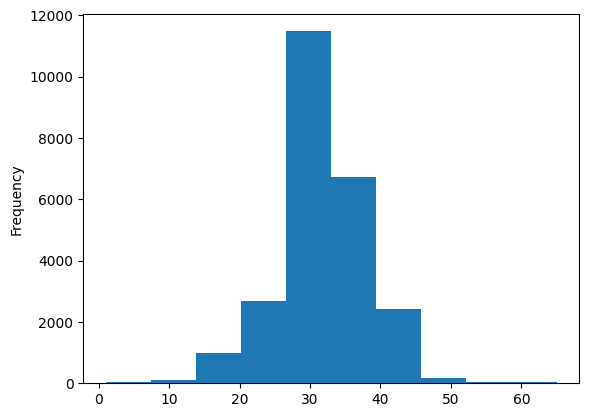

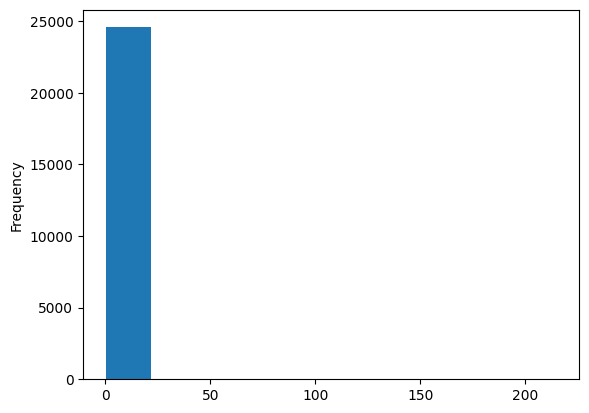

In [25]:
plt.show(df_spec.orientation.plot(kind='hist'))
plt.show(df_spec.tilt.plot(kind='hist'))

In [14]:
df_spec.orientation.unique()

array([180., 315., 225., 135., 190., 160., 215., 150., 210., 145., 217.,
       185., 170., 240., 250., 105., 200., 175., 195.,  40.,  90., 158.,
       233., 208., 159., 202., 198., 270., 174., 182., 205., 156., 197.,
       165.,  60., 130., 265., 142., 157., 219., 162., 220., 184., 209.,
       188., 230., 178., 164., 186., 110., 140., 120., 280., 124., 155.,
       177., 187., 121., 260., 272., 146., 221., 115., 100., 266., 176.,
       129., 163., 255., 193., 139., 192., 144.,  15., 181., 148., 125.,
       153., 275., 173., 191., 138., 168., 194., 183.,  50., 345.,  82.,
       166.,  45., 218., 235., 179., 213., 201., 196., 224., 152., 167.,
         7., 214., 204., 128., 147., 172., 154., 169., 161., 132., 141.,
       171., 242., 127., 104., 222., 231., 216., 258., 206., 212., 203.,
       137., 223., 149., 228., 248., 199., 123.,  48.,  31., 207., 133.,
       143., 122., 151., 114., 126., 211., 112., 108.,  32., 119.,  18.,
        35., 229., 189.,  74., 117., 136.,  94., 26

Merge the two table and start lookingn for correlations

In [55]:
df_merged = pd.merge(df_energy, df_spec, on='ss_id')